<a href="https://colab.research.google.com/github/ENSB-Projects/DrugDiscovery/blob/main/PFE_2022/Feature_Importance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.5 MB/s 


In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
# Read the CSV file in a DataFrame
dataset = pd.read_csv('MACCS_PubChem_Descriptors_DataSet.csv')
dataset

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.650000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.570000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.620000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.430000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.552842
1910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.657577
1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.301030
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.488117


In [ ]:
X = dataset.drop('pIC50',axis=1)
X

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.pIC50
Y

0       6.650000
1       6.570000
2       6.620000
3       6.430000
4       8.520000
          ...   
1909    7.552842
1910    7.657577
1911    8.301030
1912    6.488117
1913    7.207608
Name: pIC50, Length: 1914, dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8* (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(1914, 244)

### Get the selected features' names from the VarianceThreshold variable "selection"

In [ ]:
selected_features_names = selection.get_feature_names_out(selection.feature_names_in_)
selected_features_names

array(['MACCSFP16', 'MACCSFP25', 'MACCSFP38', 'MACCSFP42', 'MACCSFP43',
       'MACCSFP49', 'MACCSFP51', 'MACCSFP53', 'MACCSFP54', 'MACCSFP55',
       'MACCSFP57', 'MACCSFP58', 'MACCSFP60', 'MACCSFP61', 'MACCSFP62',
       'MACCSFP65', 'MACCSFP66', 'MACCSFP67', 'MACCSFP73', 'MACCSFP74',
       'MACCSFP75', 'MACCSFP77', 'MACCSFP78', 'MACCSFP79', 'MACCSFP80',
       'MACCSFP81', 'MACCSFP82', 'MACCSFP83', 'MACCSFP84', 'MACCSFP85',
       'MACCSFP86', 'MACCSFP87', 'MACCSFP88', 'MACCSFP90', 'MACCSFP92',
       'MACCSFP93', 'MACCSFP94', 'MACCSFP95', 'MACCSFP96', 'MACCSFP97',
       'MACCSFP98', 'MACCSFP100', 'MACCSFP102', 'MACCSFP104',
       'MACCSFP105', 'MACCSFP106', 'MACCSFP107', 'MACCSFP108',
       'MACCSFP109', 'MACCSFP110', 'MACCSFP111', 'MACCSFP112',
       'MACCSFP113', 'MACCSFP114', 'MACCSFP115', 'MACCSFP116',
       'MACCSFP117', 'MACCSFP118', 'MACCSFP119', 'MACCSFP120',
       'MACCSFP121', 'MACCSFP122', 'MACCSFP124', 'MACCSFP126',
       'MACCSFP127', 'MACCSFP128', 'MACCSFP129'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, Y_train.shape

((1531, 244), (1531,))

In [ ]:
X_test.shape, Y_test.shape

((383, 244), (383,))

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.60046836211967

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
import sklearn.metrics as sm
#Performance computation − We can also compute the performance of our regression model with the help of various performance metrics
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(Y_test,Y_test_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(Y_test,Y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_test_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 0.62
Mean squared error(MSE) = 0.7
Median absolute error = 0.44
Explain variance score = 0.6


In [ ]:
model.feature_importances_

array([0.00056209, 0.0027507 , 0.00412463, 0.01019638, 0.00188518,
       0.00692837, 0.00064321, 0.00337558, 0.00116405, 0.00044252,
       0.00394783, 0.00050446, 0.00026425, 0.00036585, 0.00694232,
       0.00433038, 0.0092114 , 0.0003997 , 0.00032279, 0.00411762,
       0.00325285, 0.0023125 , 0.00091254, 0.00566424, 0.00665088,
       0.0026699 , 0.00159983, 0.00245158, 0.01334169, 0.00174583,
       0.00388932, 0.00400074, 0.00147881, 0.00494975, 0.00468959,
       0.00448311, 0.00195129, 0.01740883, 0.00296709, 0.00647925,
       0.00479799, 0.00496975, 0.00079839, 0.00353714, 0.00422055,
       0.00303396, 0.00343687, 0.00371197, 0.00442975, 0.00093952,
       0.00585192, 0.02769118, 0.00322414, 0.00582947, 0.00578618,
       0.00703139, 0.00119257, 0.00489038, 0.00085667, 0.00301697,
       0.00195228, 0.00247713, 0.00095309, 0.00451724, 0.00376143,
       0.00462545, 0.00308069, 0.00041971, 0.00251387, 0.00416019,
       0.00304036, 0.00275691, 0.00315684, 0.00127008, 0.00275

## **Model Comparaison with Lazypredict**

In [ ]:
! pip install lazypredict 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 8.0 MB/s 
     |████████████████████████████████| 302 kB 58.7 MB/s 
     |█████████                       | 7.2 MB 24.3 MB/s eta 0:00:01ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 42/42 [01:17<00:00,  1.84s/it]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.97,0.98,0.19,0.30
ExtraTreeRegressor,0.97,0.98,0.19,0.30
ExtraTreesRegressor,0.97,0.98,0.19,5.54
GaussianProcessRegressor,0.97,0.98,0.19,1.29
XGBRegressor,0.97,0.97,0.20,1.47
MLPRegressor,0.95,0.96,0.27,4.14
RandomForestRegressor,0.91,0.93,0.35,4.12
BaggingRegressor,0.89,0.90,0.40,1.91
LGBMRegressor,0.88,0.90,0.40,0.41


In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:49<00:00,  1.19s/it]


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SVR,-0.10,0.60,0.84,1.20
HistGradientBoostingRegressor,-0.11,0.60,0.84,3.30
LGBMRegressor,-0.11,0.60,0.84,0.40
NuSVR,-0.13,0.59,0.85,1.07
RandomForestRegressor,-0.14,0.59,0.85,4.09
GradientBoostingRegressor,-0.23,0.56,0.88,2.09
MLPRegressor,-0.24,0.55,0.89,4.63
KNeighborsRegressor,-0.24,0.55,0.89,0.44
XGBRegressor,-0.26,0.54,0.89,1.42


### **Calculate metrics for all Lazypredict trained models**

In [ ]:
models = clf.provide_models(X_train, X_test, Y_train, Y_test)
models_metrics = []
for model_name in models.keys():
  Y_test_pred = models[model_name].predict(X_test)
  mse = round(sm.mean_squared_error(Y_test,Y_test_pred), 8)
  rmse= round(np.sqrt(mse), 8)
  mae = round(sm.mean_absolute_error(Y_test,Y_test_pred), 8)
  errors = abs(Y_test_pred - Y_test)
  mape = round(np.mean(errors / Y_test), 8)
  r2 = round(sm.r2_score(Y_test,Y_test_pred), 8)
  accuracy = round(100 - np.mean(100 * (errors / Y_test)), 8)
  metrics = (model_name, r2, mse, rmse, mae, mape, accuracy)
  models_metrics.append(metrics)
models_metrics_df = pd.DataFrame(models_metrics,columns=['Model Name', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE', 'Accuracy'])
models_metrics_df.sort_values(by='R2', ascending=False, inplace=True)
models_metrics_df.reset_index(drop=True, inplace=True)
models_metrics_df

,Model Name,R2,MSE,RMSE,MAE,MAPE,Accuracy
0,SVR,0.60,0.70,0.84,0.62,0.10,89.57
1,LGBMRegressor,0.60,0.71,0.84,0.61,0.10,89.70
2,HistGradientBoostingRegressor,0.60,0.71,0.84,0.61,0.10,89.70
3,NuSVR,0.59,0.72,0.85,0.63,0.11,89.39
4,RandomForestRegressor,0.59,0.72,0.85,0.63,0.11,89.24
5,GradientBoostingRegressor,0.56,0.78,0.88,0.67,0.11,88.76
6,MLPRegressor,0.55,0.78,0.89,0.67,0.11,89.23
7,KNeighborsRegressor,0.55,0.79,0.89,0.67,0.11,88.78
8,XGBRegressor,0.54,0.80,0.89,0.68,0.11,88.82
9,BaggingRegressor,0.54,0.81,0.90,0.67,0.11,88.70


## **Feature Importance Plot**

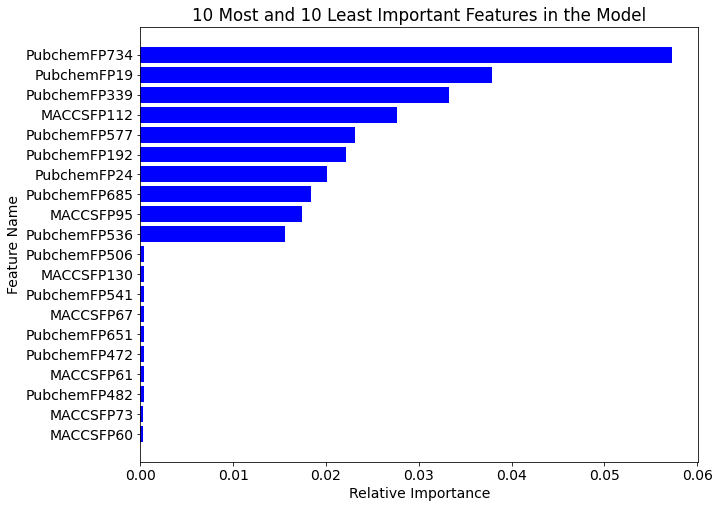

In [ ]:
features = selected_features_names
importances = model.feature_importances_
best_indices = np.argsort(importances)[-10:]
worst_indices = np.argsort(importances)[:10]
indices = np.concatenate([worst_indices, best_indices])
# indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('10 Most and 10 Least Important Features in the Model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.savefig('RF_Feature_Importance.pdf', dpi=300, bbox_inches='tight')
plt.show()

# plt.barh(selected_features_names, model.feature_importances_)

## **Other codes for Feature Importance Plot**

In [ ]:
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,100))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

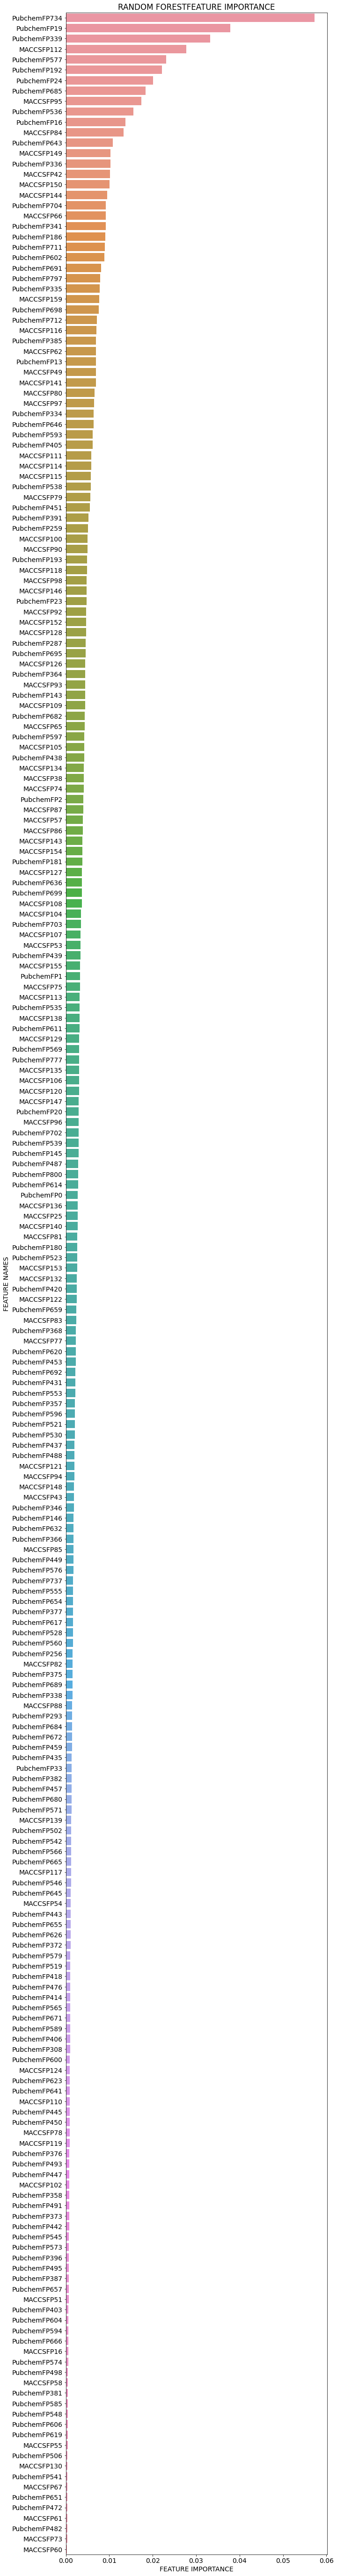

In [ ]:
plot_feature_importance(model.feature_importances_, selected_features_names,'RANDOM FOREST')

In [ ]:
features = selected_features_names
importances = model.feature_importances_
best_indices = np.argsort(importances)[-10:]
worst_indices = np.argsort(importances)[:10]
indices = np.concatenate([worst_indices, best_indices])
indices

array([ 12,  18, 157,  13, 155, 215,  17, 175,  67, 165, 172,  37, 227,
        96, 104, 190,  51, 115,  93, 239])